In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of          rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]>

In [19]:
df=df.drop(['sex'],axis=1)

In [20]:
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,Prof,B,19,18,139750
1,Prof,B,20,16,173200
2,AsstProf,B,4,3,79750
3,Prof,B,45,39,115000
4,Prof,B,40,41,141500
...,...,...,...,...,...
392,Prof,A,33,30,103106
393,Prof,A,31,19,150564
394,Prof,A,42,25,101738
395,Prof,A,25,15,95329


In [21]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [22]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [23]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

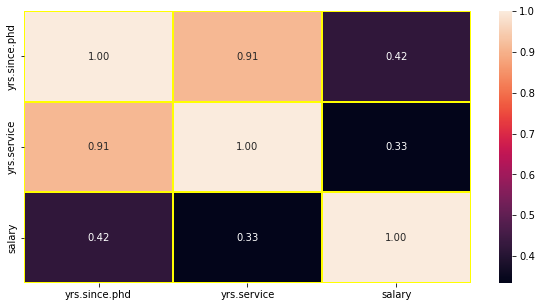

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=2,linecolor='yellow',fmt='.2f')

In [25]:
import warnings
warnings.filterwarnings('ignore')

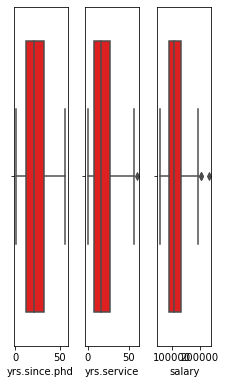

In [26]:
colmlist=df.columns.values
ncol=14
nrow=8
plt.figure(figsize=(ncol,3*ncol))
for i in range(2,len(colmlist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[colmlist[i]],color='red',orient='h')
    plt.tight_layout()

In [27]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='rank', ylabel='salary'>

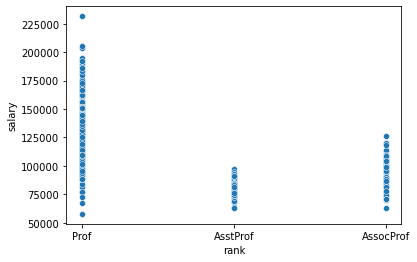

In [28]:
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

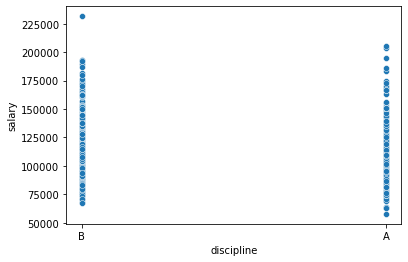

In [29]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

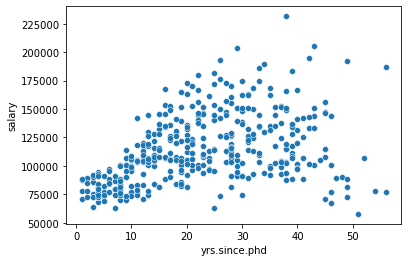

In [30]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

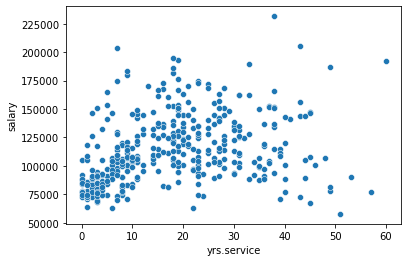

In [31]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

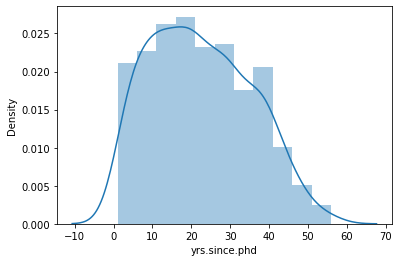

In [33]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

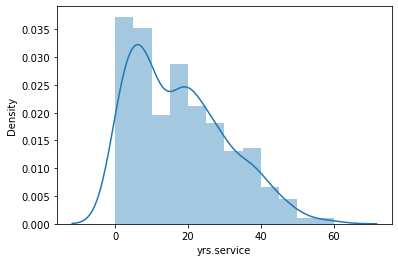

In [35]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

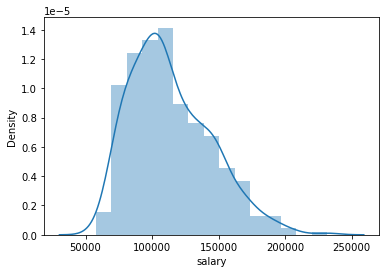

In [36]:
sns.distplot(df['salary'])

In [37]:
df.corr()["salary"]

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [101]:
df=df.drop(['yrs.since.phd'],axis=1)

In [102]:
df

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [103]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 2)

In [104]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))


In [105]:
len(np.where(z>3)[0])

4

In [106]:
z.iloc[43]

yrs.service    1.569358
salary         3.895377
Name: 43, dtype: float64

In [107]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print('total_droped_rows',df.shape[0] - df_new.shape[0])

old dataframe (397, 2)
new dataframe (393, 2)
total_droped_rows 4


In [108]:
loss_percentage=(4/397)*100
loss_percentage

1.0075566750629723

In [109]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [110]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [111]:
x

,yrs.service
0,18
1,16
2,3
3,39
4,41
...,...
392,30
393,19
394,25
395,15


In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.05627813],
       [-0.10226886],
       [-1.13282426],
       [ 1.72102147],
       [ 1.87956846],
       [-0.89500378],
       [ 0.45264559],
       [ 2.19666243],
       [ 0.21482511],
       [ 0.05627813],
       [-0.7364568 ],
       [-1.21209775],
       [-1.29137124],
       [-1.37064474],
       [ 0.05627813],
       [-1.13282426],
       [ 0.21482511],
       [ 1.32465401],
       [ 0.45264559],
       [ 1.48320099],
       [ 0.69046607],
       [ 1.08683353],
       [ 1.00756004],
       [ 0.13555162],
       [-0.7364568 ],
       [-0.7364568 ],
       [ 0.45264559],
       [-1.13282426],
       [-1.37064474],
       [-0.7364568 ],
       [-1.05355077],
       [-1.21209775],
       [-0.6571833 ],
       [-1.21209775],
       [-1.21209775],
       [-1.37064474],
       [ 0.29409861],
       [-1.05355077],
       [ 1.08683353],
       [-0.6571833 ],
       [-1.21209775],
       [ 0.45264559],
       [ 0.76973956],
       [ 0.13555162],
       [-0.18154235],
       [ 0

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
pred_test


array([100688.91859766, 131692.96488923, 126645.79456269, 100688.91859766,
       107899.16192128, 103573.01592711, 117993.50257435, 109341.210586  ,
       120877.5999038 , 125924.77023033, 104294.04025947, 111504.28358309,
       120877.5999038 , 103573.01592711, 129529.89189214, 102851.99159474,
       119435.55123907, 102851.99159474, 110783.25925073, 112225.30791545,
       107178.13758892, 115830.42957726, 106457.11325655, 102851.99159474,
       105736.08892419, 103573.01592711, 114388.38091254, 112225.30791545,
       118714.52690671, 109341.210586  , 120156.57557143, 117272.47824199,
       122319.64856852, 114388.38091254, 103573.01592711, 111504.28358309,
       107178.13758892, 122319.64856852, 102851.99159474, 117272.47824199,
       112225.30791545, 126645.79456269, 102130.96726238, 122319.64856852,
       107178.13758892, 116551.45390962, 106457.11325655, 125924.77023033,
       104294.04025947, 106457.11325655, 113667.35658018, 106457.11325655,
       117272.47824199, 1

In [116]:
y_test

114    105000
283    155865
69      91412
157     88000
332    105450
        ...  
91     105128
125     78162
65     100522
56     117704
302    170500
Name: salary, Length: 79, dtype: int64

In [117]:
diff=pred_test-y_test
diff

114    -4311.081402
283   -24172.035111
69     35233.794563
157    12688.918598
332     2449.161921
           ...     
91       608.088924
125    57857.110883
65      5935.113257
56     -1873.570423
302   -60437.765082
Name: salary, Length: 79, dtype: float64

In [118]:
import numpy as np
a=np.array(y_test)
pred=np.array(pred_test)
diff=np.array(diff)
Result=pd.DataFrame({'Actual':a,'Predicted':pred,'Difference':diff},index=range(len(a)))
Result

,Actual,Predicted,Difference
0,105000,100688.918598,-4311.081402
1,155865,131692.964889,-24172.035111
2,91412,126645.794563,35233.794563
3,88000,100688.918598,12688.918598
4,105450,107899.161921,2449.161921
...,...,...,...
74,105128,105736.088924,608.088924
75,78162,136019.110883,57857.110883
76,100522,106457.113257,5935.113257
77,117704,115830.429577,-1873.570423
